<a href="https://colab.research.google.com/github/KukovecRok/AlexNet_inefficient_using_NiaPy/blob/main/AlexNetDiplomska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predpogoj - mount gDrive

In [ ]:
# Nujno potrebno za dostop do datotek iz gDrivea
from google.colab import drive
drive.mount('/content/gdrive') # Preverjanje pristnosti.. 

Mounted at /content/gdrive


In [ ]:
# Potrebni importi
import os
import torch
import torch.nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F 
import torchvision.utils as utils
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import argparse
import PIL.Image
import pandas as pd
import glob
from pathlib import Path
import time
from numpy import asarray

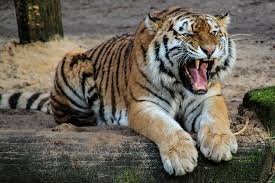

In [ ]:
from IPython.display import Image, display
display(Image('/content/gdrive/MyDrive/Colab Notebooks/slike/tiger.jpg')) # Slika iz https://phys.org/news/2019-11-indian-authorities-exaggerated-tiger.html

## Prikaz random slike iz množice

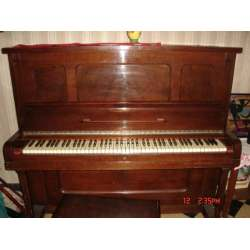

In [ ]:
import random, os
# Prikaz nakljucne slike
path = "/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/"
random_file = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
Image('/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/'+random_file)

## Funkcija napovejSlike

In [ ]:
def napovejSlike(slika, alexnet):
   # Obdelava velikosti slike
    data_transforms = transforms.Compose([
        transforms.Resize((224,224)),       # Nastavi velikost sičic 224x224
        transforms.ToTensor(),              # Input na Tensorjev format
        transforms.Normalize( # Normalizacija
            mean=[0.485, 0.456, 0.406], 
            std=[0.229, 0.224, 0.225]
        )])
    # Odpiranje slik
    transformed_img = data_transforms(slika) # Klicanje funkcije za obdelavo velikosti slik(e)
    batch_img = torch.unsqueeze(transformed_img, 0)
    
    output = alexnet(batch_img)

    sorted, indices = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0 
    
    return indices, percentage

In [ ]:
# Izboljsana napoved - vse slike v mapi
CasZacetek = time.time()

alexnet = models.alexnet(pretrained=True)
alexnet.eval()

df = None
if df is not None:
    df = df.drop(['SlicicaNo.','Dejansko','Napovedano','PoNiaPy','Tocnost'], axis=1, errors='ignore')

#images = glob.glob("/content/gdrive/MyDrive/Colab Notebooks/slike/*.jpg")
images = glob.glob("/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/*.JPEG")
podatki = []
for image in images:
   with open(image, 'rb') as file:
        img = PIL.Image.open(file)
        indices, percentage = napovejSlike(img, alexnet)
        i = 0
        with open('/content/gdrive/MyDrive/Colab Notebooks/class_names_ImageNet.txt') as labels:
            classes = [i.strip() for i in labels.readlines()]

            # Top 5 razredov po verjetnosti napovedi
            results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]

            podatki.append({
                'Slicica No.': (Path(file.name).stem)[20:],
                'Napovedano':  results[0][0],
                'PoNiaPy' : ['Sledi'],
                'Tocnost' : results[0][1],
                'ImeDatoteke' : (Path(file.name).stem + ".JPEG")
            })

            print("\nTop 5 napovedanih razredov")
            for i in range(5):
                print('{}: {:.4f}%'.format(results[i][0], results[i][1]))
            print('\nNaš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')

df = pd.DataFrame(data=podatki)
df.sort_values(by='Tocnost', ascending=False, inplace=True)

CasKonec = time.time()
trajanje = CasKonec - CasZacetek
trajanje
# Merjenje časa - CPU 71 sekund ; GPU 301; TPU 338 - nekaj ni ok..

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth




Top 5 napovedanih razredov
lifeboat: 99.9394%
amphibian, amphibious vehicle: 0.0449%
fireboat: 0.0065%
drilling platform, offshore rig: 0.0057%
paddlewheel, paddle wheel: 0.0008%

Naš napovedan razred: lifeboat 
Algoritem to trdi z zagotovostvjo 99.94%

Top 5 napovedanih razredov
colobus, colobus monkey: 90.2471%
skunk, polecat, wood pussy: 1.9499%
indri, indris, Indri indri, Indri brevicaudatus: 1.3140%
Border collie: 1.3132%
chickadee: 0.4565%

Naš napovedan razred: colobus, colobus monkey 
Algoritem to trdi z zagotovostvjo 90.25%

Top 5 napovedanih razredov
Staffordshire bullterrier, Staffordshire bull terrier: 27.1404%
Boston bull, Boston terrier: 27.0393%
Cardigan, Cardigan Welsh corgi: 8.6322%
collie: 6.6209%
kelpie: 4.7766%

Naš napovedan razred: Staffordshire bullterrier, Staffordshire bull terrier 
Algoritem to trdi z zagotovostvjo 27.14%

Top 5 napovedanih razredov
jaguar, panther, Panthera onca, Felis onca: 39.3982%
leopard, Panthera pardus: 19.0041%
Egyptian cat: 5.9389%


KeyboardInterrupt: ignored

## Slike iz ILSVRC2010
Model se je na njih izkazal za zelo uspešnega

Tukaj imamo tabelo imen datotek ter kategorij, v katero spadajo

In [ ]:
df1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/MatLab/ID,Ime,Kategorija.csv", sep=";", index_col=0) 
df1.sample(5) 

,ImeDatoteke,Kategorija
ID_Kategorija,,
446,ILSVRC2010_val_00047794.JPEG,"tiger, Panthera tigris"
263,ILSVRC2010_val_00049781.JPEG,lichen
855,ILSVRC2010_val_00028250.JPEG,"butcher shop, meat market"
733,ILSVRC2010_val_00020983.JPEG,baseball
407,ILSVRC2010_val_00023577.JPEG,"colobus, colobus monkey"


## Skupne kategorije
* 634
* Kategorije v preseku, ki jih zna napovedatovat tale AlexNet in slike iz ILSVRC2010
* Validacijska množica ni uporabljena za učenje, rezultati bodo verjetno višji kot pri testni, kar je v mojem primeru tudi smiselno
* Velika točnost pred NiaPy, nato pa nekaj popolnoma drugega za "enako" sliko..

In [ ]:
df2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/MatLab/BothKategorije.csv", sep=";", index_col=0) 
print(len(df2))
#df2.head(10)

634


## Predpripravljena tabela 
* stolpec NiaPy se bo napolnil kasneje

In [ ]:
# Združevanje za dejanske kategorije
df = df.merge(df1, how='inner', on='ImeDatoteke')
# Brisanje praznih (v df1 je 50.000 vrstic - celotna _val množica slik)
df.dropna(inplace=True)
# Združevanje iz dataframera samo skupnih kategorij --> Inner join odstrani vse primerke, ki jih naš model ne zna napovedat
df = df.merge(df2, how='inner', on='Kategorija')
# Preimenovanje stolpca
df = df.rename(columns={"Kategorija": "Dejanska_kategorija"})
# Zamenjava vrstnega reda stolpcev
df = df[['Slicica No.','Dejanska_kategorija','Napovedano','PoNiaPy','Tocnost','ImeDatoteke']]
df.sort_values(by=['Tocnost'], ascending=False).head(10)
# Dolžina df = 636, kar se sklada s številom različnih imen datotek, katerih kategorije zna napovedat
# V driveu je 1000 slik, vseh kategorij je ~1600, naš AlexNet jih zna napovedat ~2/3 = 1000. 
# Slike so randomly vendar konsistentno poimenovane, ~2/3 * 1000 = ~ 640, torej bo najverjetneje držalo

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
0,472,"chambered nautilus, pearly nautilus, nautilus","chambered nautilus, pearly nautilus, nautilus",[Sledi],100.000000,ILSVRC2010_val_00000472.JPEG
2,857,baseball,baseball,[Sledi],99.999985,ILSVRC2010_val_00000857.JPEG
4,041,"odometer, hodometer, mileometer, milometer","odometer, hodometer, mileometer, milometer",[Sledi],99.999763,ILSVRC2010_val_00000041.JPEG
6,733,"maze, labyrinth","maze, labyrinth",[Sledi],99.998917,ILSVRC2010_val_00000733.JPEG
10,116,manhole cover,manhole cover,[Sledi],99.998734,ILSVRC2010_val_00000116.JPEG
13,680,shopping basket,shopping basket,[Sledi],99.998451,ILSVRC2010_val_00000680.JPEG
16,620,"pool table, billiard table, snooker table","pool table, billiard table, snooker table",[Sledi],99.997139,ILSVRC2010_val_00000620.JPEG
19,362,"upright, upright piano","upright, upright piano",[Sledi],99.996796,ILSVRC2010_val_00000362.JPEG
21,990,"giant panda, panda, panda bear, coon bear, Ail...","giant panda, panda, panda bear, coon bear, Ail...",[Sledi],99.995758,ILSVRC2010_val_00000990.JPEG
24,371,"bobsled, bobsleigh, bob","bobsled, bobsleigh, bob",[Sledi],99.994896,ILSVRC2010_val_00000371.JPEG


In [ ]:
col_one_list = df['ImeDatoteke'].tolist()
col_one_list.sort()
# Število različnih imen datotek = 637 - Nekatere kategorije so podvojene (različne slike spadajo v enako kategorijo)
len(col_one_list)

637

## Tabela napačno napovedanih

In [ ]:
dfNapacni = df[~df['Dejanska_kategorija'].isin(df['Napovedano'])]
dfNapacni.sort_values(by=['Tocnost'], ascending=False).head(10)

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
262,977,otter,badger,[Sledi],90.782722,ILSVRC2010_val_00000977.JPEG
300,855,"bakery, bakeshop, bakehouse",trifle,[Sledi],87.583473,ILSVRC2010_val_00000855.JPEG
305,415,trimaran,catamaran,[Sledi],86.632591,ILSVRC2010_val_00000415.JPEG
312,193,screwdriver,nail,[Sledi],85.336327,ILSVRC2010_val_00000193.JPEG
329,704,"green lizard, Lacerta viridis","American chameleon, anole, Anolis carolinensis",[Sledi],82.166130,ILSVRC2010_val_00000704.JPEG
337,155,partridge,"ruffed grouse, partridge, Bonasa umbellus",[Sledi],79.790657,ILSVRC2010_val_00000155.JPEG
343,344,cliff dwelling,"sloth bear, Melursus ursinus, Ursus ursinus",[Sledi],78.339386,ILSVRC2010_val_00000344.JPEG
397,353,"artichoke, globe artichoke",cardoon,[Sledi],70.422081,ILSVRC2010_val_00000353.JPEG
416,975,tiger cat,"tiger, Panthera tigris",[Sledi],65.720955,ILSVRC2010_val_00000975.JPEG
263,728,otter,"red-backed sandpiper, dunlin, Erolia alpina",[Sledi],65.469406,ILSVRC2010_val_00000728.JPEG


## Tabela pravilno napovedanih

In [ ]:
dfPravilni = df[df['Dejanska_kategorija'].isin(df['Napovedano'])] #dfPravilni = df.loc[df['Dejanska_kategorija'] == df['Napovedano']] # Drugačna sintaksa za isto stvar
dfPravilni.sort_values(by=['Tocnost'], ascending=False).head(10)

,Slicica No.,Dejanska_kategorija,Napovedano,PoNiaPy,Tocnost,ImeDatoteke
0,472,"chambered nautilus, pearly nautilus, nautilus","chambered nautilus, pearly nautilus, nautilus",[Sledi],100.000000,ILSVRC2010_val_00000472.JPEG
2,857,baseball,baseball,[Sledi],99.999985,ILSVRC2010_val_00000857.JPEG
4,041,"odometer, hodometer, mileometer, milometer","odometer, hodometer, mileometer, milometer",[Sledi],99.999763,ILSVRC2010_val_00000041.JPEG
6,733,"maze, labyrinth","maze, labyrinth",[Sledi],99.998917,ILSVRC2010_val_00000733.JPEG
10,116,manhole cover,manhole cover,[Sledi],99.998734,ILSVRC2010_val_00000116.JPEG
13,680,shopping basket,shopping basket,[Sledi],99.998451,ILSVRC2010_val_00000680.JPEG
16,620,"pool table, billiard table, snooker table","pool table, billiard table, snooker table",[Sledi],99.997139,ILSVRC2010_val_00000620.JPEG
19,362,"upright, upright piano","upright, upright piano",[Sledi],99.996796,ILSVRC2010_val_00000362.JPEG
21,990,"giant panda, panda, panda bear, coon bear, Ail...","giant panda, panda, panda bear, coon bear, Ail...",[Sledi],99.995758,ILSVRC2010_val_00000990.JPEG
24,371,"bobsled, bobsleigh, bob","bobsled, bobsleigh, bob",[Sledi],99.994896,ILSVRC2010_val_00000371.JPEG


## Statistika nad ILSVRC2010_val_\*\*\*\*****.JPEG

In [ ]:
pravilno_napovedani = len(df.index) - len(dfNapacni.index)
print("Vsi napovedani: " + str(len(df.index)) + "\nPravilno napovedani: " + str(pravilno_napovedani) +"\nNapacno napovedani: " + str(len(dfNapacni.index)))
Tocnost = (pravilno_napovedani / len(df.index)* 100)
print("Tocnost: %.4f"% Tocnost+"%")

Vsi napovedani: 637
Pravilno napovedani: 535
Napacno napovedani: 102
Tocnost: 83.9874%


In [ ]:
# Napoved 1 slike
slika = 'ILSVRC2010_val_00000857.JPEG'
with open('/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/'+slika, 'rb') as file:
    img = PIL.Image.open(file)
    indices, percentage = napovejSlike(img, alexnet)
    with open('/content/gdrive/MyDrive/Colab Notebooks/class_names_ImageNet.txt') as labels:
            classes = [i.strip() for i in labels.readlines()]

            # Top 5 razredov po verjetnosti napovedi
            results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
            print('\nNaš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')


Naš napovedan razred: baseball 
Algoritem to trdi z zagotovostvjo 100.00%


In [ ]:
!pip install NiaPy==2.0.0rc12

     |████████████████████████████████| 225kB 4.1MB/s 
     |████████████████████████████████| 174kB 7.1MB/s 
     |████████████████████████████████| 829kB 6.6MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.3-py2.py3-none-any.whl size=241261 sha256=bbf10530411cc7e188aa7af7b35629225fb9634e7287f65991c9a4190a593724
  Stored in directory: /root/.cache/pip/wheels/b5/85/ca/e768ac132e57e75e645a151f8badac71cc0089e7225dddf76b
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=53570326fc182b0821f077fd98ee48ade2f3292511b061e089d7b14a3cb4b466
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built openpyxl future
  Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


# NiaPy 
Prva ideja je po vzoru TestBenchmark.py, ustvarit array podoben " iskanje = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]"
* Pretvorba slike v 1d array
* Standardizacija ( vsaka vrednost v arrayu / 255)
* Izvajanje NiaPy
* Pretvorba napovedanih vredenosti nazaj v vrednosti med 1 - 255 ( * 255)
* Pretvorba 1d arraya v sliko
* Prikaz slike, primerjava..
### Prihaja do napake pri pretvorbi ( i / 255 ; i * 255 ) 
* Sumim .reshape (np.asarray(flat_arr).reshape(prvotenShape))

Test
[0.9686274509803922, 0.9686274509803922, 0.9686274509803922, 0.9647058823529412, 0.9647058823529412, 0.9647058823529412, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.984313725490196, 0.984313725490196, 0.984313725490196, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9921568627450981, 0.9921568627450981, 1.0, 0.9921568627450981, 0.9921568627450981, 1.0, 0.996078431372549, 0.996078431372549, 1.0, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.996078431

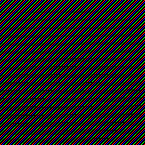

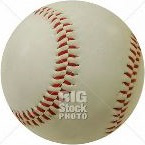

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
63075
63075
equal
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]


In [ ]:
def slikaV1d(img):
    arr = np.array(img) # Pretvori v array
    prvotenShape = arr.shape # Shrani prvoten shape slike
    flat_arr = arr.ravel() # Pretvori array v 1d array
    return prvotenShape, flat_arr

def slikaIZ1d(flat_arr, prvotenShape):
    arr2 = np.asarray(flat_arr).reshape(prvotenShape)
    img2 = PIL.Image.fromarray(arr2, 'RGB')
    return img2
    
# RGBA -->RGB !!
#img = PIL.Image.open('/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/ILSVRC2010_val_00000857.JPEG').convert('RGB') 
img = PIL.Image.open('/content/gdrive/MyDrive/Colab Notebooks/slike/bejzbol.JPEG').convert('RGB') 

prvotenShape, flat_arr = slikaV1d(img)
#test = flat_arr / 255
test = [i / 255 for i in flat_arr]
print("Test")
print(test)
testDva = [int(i * 255) for i in test]

print("TestDVA")
#testDva = asarray(testDva)
#testDva = np.around(testDva)
#testDva = testDva.astype(int)
print(testDva)
#print(testDva.tolist())
print("flat_arr")
print(flat_arr)
#print(flat_arr.tolist())
#testDva = testDva.tolist()
#flat_arr = flat_arr.tolist()
#np.round(testDva.tolist().transpose()).astype(int)
#flat_arr = testDva

#slika = slikaIZ1d(flat_arr, prvotenShape) # TO RABIŠ

arr2 = np.asarray(testDva).reshape(prvotenShape)
img2 = PIL.Image.fromarray(arr2, 'RGB')
display(img2) #in ipynb

arr3 = np.asarray(flat_arr).reshape(prvotenShape)
img3 = PIL.Image.fromarray(arr3, 'RGB')
display(img3) #in ipynb

#display(slika) #in ipynb  # TO RABIŠ
#slika.show() # in picture viewer
#print(type(testDva))
testDva = asarray(testDva)
print(type(testDva))
print(type(flat_arr))
print(len(testDva))
print(len(flat_arr))
#image2 = PIL.Image.fromarray(testDva)
if(str(arr2) == str(arr3)):
    print ('equal')
else:
    print ('not equal')

import json

with open('outflat.txt', 'w') as filehandle:
  json.dump(flat_arr.tolist(), filehandle)
with open('outtestDva.txt', 'w') as filehandle:
  json.dump(testDva.tolist(), filehandle)

arr2.shape

print(arr2 == arr3)

In [ ]:
# Napoved 1 slike
#slika = 'ILSVRC2010_val_00000857.JPEG'
slika = 'bejzbol.JPEG'
#with open('/content/gdrive/MyDrive/Colab Notebooks/slike/ILSVRC2010_val/'+slika, 'rb') as file:
with open('/content/gdrive/MyDrive/Colab Notebooks/slike/'+slika, 'rb') as file:
    img = PIL.Image.open(file)
    indices, percentage = napovejSlike(img, alexnet)
    with open('/content/gdrive/MyDrive/Colab Notebooks/class_names_ImageNet.txt') as labels:
            classes = [i.strip() for i in labels.readlines()]

            # Top 5 razredov po verjetnosti napovedi
            results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
            print('\nNaš napovedan razred: ' + str(results[0][0]) + ' \nAlgoritem to trdi z zagotovostvjo %.2f' %(results[0][1])+'%')


Naš napovedan razred: baseball 
Algoritem to trdi z zagotovostvjo 100.00%


In [ ]:
from NiaPy.algorithms.basic.pso import ParticleSwarmAlgorithm
from NiaPy.benchmarks import Benchmark
from NiaPy.task.task import OptimizationType, StoppingTask


class TestBenchmark(Benchmark):

    def __init__(self, iskanje):
        self.Lower = 0
        self.Upper = 1
        super().__init__(self.Lower, self.Upper)

        self.iskanje = iskanje

    def function(self):
        def evaluate(D, solution):
            # print(f'D: {D}')
            # print(f'solution: {solution}')

            razlika = 0
            for i in range(D):
                razlika = razlika + abs(iskanje[i] - solution[i])

            return razlika

        return evaluate


if __name__ == "__main__":
    iskanje = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    algoritem = ParticleSwarmAlgorithm(NP=10)
    benchm = TestBenchmark(iskanje=iskanje)
    task = StoppingTask(D=len(iskanje),
                        nFES=1000,
                        optType=OptimizationType.MINIMIZATION,
                        benchmark=benchm)

    resitev, fitness = algoritem.run(task=task)

    print(resitev)
    print(fitness)


[0.0871142  0.20681135 0.32611467 0.41505876 0.49177467 0.58831666
 0.69319287 0.79935926 0.99886663]
0.1870937584315395


In [ ]:
slikica =  slikaIZ1d(resitev, prvotenShape)
display(slikica)
print(resitev)

NameError: ignored

iskanje: [247, 247, 247, 246, 246, 246, 250, 250, 250, 255, 255, 255, 255, 255, 255, 253, 253, 253, 251, 251, 251, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 253, 253, 250, 250, 250, 253, 253, 255, 253, 253, 255, 254, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 254, 254, 252, 255, 255, 253, 255, 255, 253, 255, 255, 253, 255, 255, 253, 255, 255, 253, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 251, 254, 254, 252, 253, 255, 252, 250, 255, 251, 250, 254, 253, 250, 255, 254, 250, 255, 254, 251, 255, 254, 252, 255, 255, 246, 248, 247, 252, 254, 253, 251, 253, 252, 252, 254, 253, 249, 251, 248, 244, 249, 245, 250, 255, 251, 255, 247, 251, 255, 247, 250, 255, 250, 251, 255, 254, 252, 252, 255, 251, 251, 255, 251, 252, 255, 250, 253, 254, 248, 254, 251, 244, 255, 250, 245, 255, 250, 246, 255, 249, 245, 255, 249, 243, 252, 249, 242, 249, 252, 243, 248, 254, 244, 253, 253, 245, 242, 243, 235, 

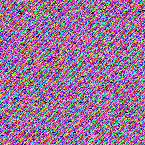

[31306.78090037 56572.10380788 13922.96422358 ... 34589.35021545
 60808.34139143 37738.95395865]


In [ ]:
from NiaPy.algorithms.basic.pso import ParticleSwarmAlgorithm
from NiaPy.benchmarks import Benchmark
from NiaPy.task.task import OptimizationType, StoppingTask

CasZacetek = time.time()

class TestBenchmark(Benchmark):

    #def __init__(self, iskanje, alexnet):
    def __init__(self, iskanje):
        self.Lower = 0
        self.Upper = 1
        super().__init__(self.Lower, self.Upper)

        self.iskanje = iskanje

    def function(self):
        def evaluate(D, solution):
            #print(f'D: {D}')
            #print(f'solution: {solution}')

            razlika = 0
            for i in range(D):
                razlika = razlika + abs(iskanje[i] - solution[i])

            return razlika

        return evaluate


if __name__ == "__main__":
    #iskanje = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    #iskanje = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    iskanje = flat_arr.tolist()
    print("iskanje: " + str(iskanje))
    
    #iskanje = asarray(img) #v array 
    #iskanje = iskanje.tolist()

    algoritem = ParticleSwarmAlgorithm(NP=1000)
    benchm = TestBenchmark(iskanje=iskanje)
    task = StoppingTask(D=len(iskanje),
                        nFES=50000,
                        optType=OptimizationType.MINIMIZATION,
                        benchmark=benchm)

    resitev, fitness = algoritem.run(task=task)

    #resitev = np.array(resitev)
    #resitev = resitev * 255

    print("RESITEV: " + str(resitev))
    print("FITNESS: " + str(fitness))

#prvotenShape=(3,3,1)
slikica =  slikaIZ1d(resitev, prvotenShape)
display(slikica)
print(resitev)

CasKonec = time.time()
trajanje = CasKonec - CasZacetek
trajanje

iskanje = asarray(img) #v array 
image2 = PIL.Image.fromarray(slikovna) # iz arraya

[247 247 247 ... 252 252 252]
[0.96862745 0.96862745 0.96862745 ... 0.98823529 0.98823529 0.98823529]
[0.9686274509803922, 0.9686274509803922, 0.9686274509803922, 0.9647058823529412, 0.9647058823529412, 0.9647058823529412, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.984313725490196, 0.984313725490196, 0.984313725490196, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9921568627450981, 0.9921568627450981, 1.0, 0.9921568627450981, 0.9921568627450981, 1.0, 0.996078431372549, 0.996078431372

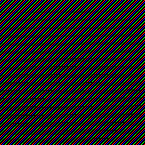

In [ ]:
iskanje = flat_arr
print(iskanje)

iskanje = iskanje / 255

print(iskanje)
iskanje = iskanje.tolist()

print(iskanje)
iskanje = np.array(iskanje)

print(iskanje)
iskanje = iskanje * 255
slikica =  slikaIZ1d(iskanje, prvotenShape)

iskanje = np.round(iskanje.transpose()).astype(int)

slikica =  slikaIZ1d(iskanje, prvotenShape)
display(slikica)

In [ ]:
from numpy import asarray
slikovna = asarray(img) #v array 
print(slikovna)
image2 = PIL.Image.fromarray(slikovna) # iz arraya

#display(image2)
print(image2)

[[[247 247 247]
  [246 246 246]
  [250 250 250]
  ...
  [253 253 253]
  [252 252 252]
  [248 248 248]]

 [[248 248 248]
  [248 248 248]
  [249 249 249]
  ...
  [250 250 250]
  [247 247 247]
  [245 245 245]]

 [[250 250 250]
  [250 250 250]
  [248 248 248]
  ...
  [247 247 247]
  [245 245 245]
  [245 245 245]]

 ...

 [[246 246 246]
  [246 246 246]
  [248 248 248]
  ...
  [252 252 252]
  [249 249 249]
  [247 247 247]]

 [[244 244 244]
  [247 247 247]
  [252 252 252]
  ...
  [253 253 253]
  [252 252 252]
  [248 248 248]]

 [[251 251 251]
  [253 253 253]
  [254 254 254]
  ...
  [253 253 253]
  [252 252 252]
  [252 252 252]]]
<PIL.Image.Image image mode=RGB size=145x145 at 0x7FB6E39B9A58>
